In [88]:
import pandas as pd
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

file_path = '/Users/rebeccluo/Downloads/US_Paid_leave_analysis.dta'

# Load the file into a DataFrame
df = pd.read_stata(file_path)
# Load the Stata file into a DataFrame


# Display the first few rows of the DataFrame
column_names = df.columns.tolist()
print(column_names)

# Print the column names
birth_vars = [f'_IBirth_{i}' for i in range(2, 52)]
post_policy_var = ['_Ipost_poli_1']
birxpos_vars = [f'_IBirXpos_{i}_1' for i in range(2, 11)]  # Adjust range as needed
llbirth_vars = [f'_LlBirth_{i}' for i in [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                                  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                  35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]
llbipos_vars = [f'_LlBiXpos_{i}_1' for i in [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                                  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                  35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]

# Combine all variables into one list
all_vars = birth_vars + post_policy_var + birxpos_vars + llbirth_vars + llbipos_vars 


['ssuid', 'spanel', 'swave', 'srefmon', 'rhcalmn', 'rhcalyr', 'tfipsst', 'epppnum', 'esex', 'wpfinwgt', 'tage', 'eeducate', 'rmesr', 'birth_month', 'sippid', 'months', 'date', 'birth', 'birth_seen_f', 'birth_seen', 'ref_month_ns', 'ref_month', 'state', 'end_date', 'end_weight_f', 'end_weight', 'CA_date', 'NJ_date', 'post_policy', 'rm_lfp', 'working', 'looking', 'lt_college_f', 'lt_college', 'Birth', '_IBirth_2', '_IBirth_3', '_IBirth_4', '_IBirth_5', '_IBirth_6', '_IBirth_7', '_IBirth_8', '_IBirth_9', '_IBirth_10', '_IBirth_11', '_IBirth_12', '_IBirth_13', '_IBirth_14', '_IBirth_15', '_IBirth_16', '_IBirth_17', '_IBirth_18', '_IBirth_19', '_IBirth_20', '_IBirth_21', '_IBirth_22', '_IBirth_23', '_IBirth_24', '_IBirth_25', '_IBirth_26', '_IBirth_27', '_IBirth_28', '_IBirth_29', '_IBirth_30', '_IBirth_31', '_IBirth_32', '_IBirth_33', '_IBirth_34', '_IBirth_35', '_IBirth_36', '_IBirth_37', '_IBirth_38', '_IBirth_39', '_IBirth_40', '_IBirth_41', '_IBirth_42', '_IBirth_43', '_IBirth_44', '_I

In [89]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [90]:
model = MS(df.columns.drop('rm_lfp'), intercept=False)
D = model.fit_transform(df)
feature_names = list(df.columns)
X = np.asarray(D)

In [91]:
X = df[all_vars]  # Drop the target variable
feature_names = X.columns.tolist()  #

print(feature_names)

['_IBirth_2', '_IBirth_3', '_IBirth_4', '_IBirth_5', '_IBirth_6', '_IBirth_7', '_IBirth_8', '_IBirth_9', '_IBirth_10', '_IBirth_11', '_IBirth_12', '_IBirth_13', '_IBirth_14', '_IBirth_15', '_IBirth_16', '_IBirth_17', '_IBirth_18', '_IBirth_19', '_IBirth_20', '_IBirth_21', '_IBirth_22', '_IBirth_23', '_IBirth_24', '_IBirth_25', '_IBirth_26', '_IBirth_27', '_IBirth_28', '_IBirth_29', '_IBirth_30', '_IBirth_31', '_IBirth_32', '_IBirth_33', '_IBirth_34', '_IBirth_35', '_IBirth_36', '_IBirth_37', '_IBirth_38', '_IBirth_39', '_IBirth_40', '_IBirth_41', '_IBirth_42', '_IBirth_43', '_IBirth_44', '_IBirth_45', '_IBirth_46', '_IBirth_47', '_IBirth_48', '_IBirth_49', '_IBirth_50', '_IBirth_51', '_Ipost_poli_1', '_IBirXpos_2_1', '_IBirXpos_3_1', '_IBirXpos_4_1', '_IBirXpos_5_1', '_IBirXpos_6_1', '_IBirXpos_7_1', '_IBirXpos_8_1', '_IBirXpos_9_1', '_IBirXpos_10_1', '_LlBirth_8', '_LlBirth_9', '_LlBirth_10', '_LlBirth_11', '_LlBirth_12', '_LlBirth_13', '_LlBirth_14', '_LlBirth_15', '_LlBirth_16', '_L

In [92]:

df = df[all_vars+ ['rm_lfp']]

df_clean = df.dropna(subset=['rm_lfp'])


# Step 2: Create feature matrix X and target variable y
X = df_clean.drop(columns=['rm_lfp'])  # Feature matrix
y = df_clean['rm_lfp'].reset_index(drop=True)

In [93]:


# Step 2: Create feature matrix X and target variable y
  
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                df_clean['rm_lfp'],
                                test_size=0.3,
                                random_state=0)



print(f"Number of NaN values in y_train after split: {y_train.isna().sum()}")  # Should be 0


Number of NaN values in y_train after split: 0


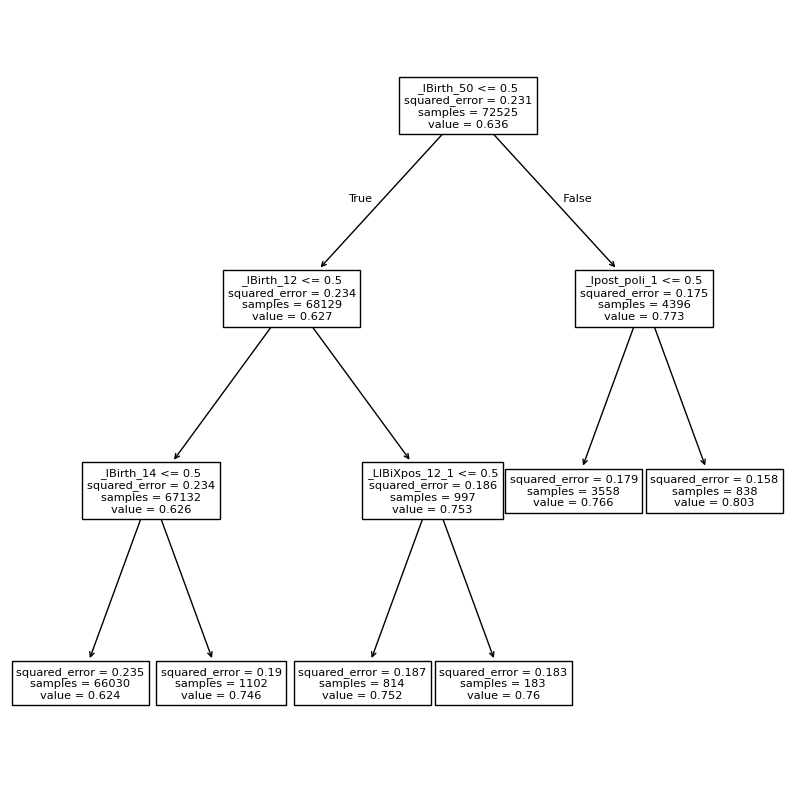

In [18]:
from matplotlib.pyplot import subplots
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize=(10,10))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);


In [29]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)  #regression tree MSE

0.2298737033642186

In [94]:
#######CLASSIFICATION

High = np.where(df.rm_lfp == 1,
                "Yes",
                "No")


In [95]:

model = MS(df.columns.drop('rm_lfp'), intercept=False)
D = model.fit_transform(df)
feature_names = list(df[all_vars].columns)
X = np.asarray(D)
df_clean = df.dropna(subset=['rm_lfp'])
X = df_clean.drop(columns=['rm_lfp']) 
High = df_clean['rm_lfp'].reset_index(drop=True)
feature_names = X.columns.tolist() 

In [96]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X, High)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

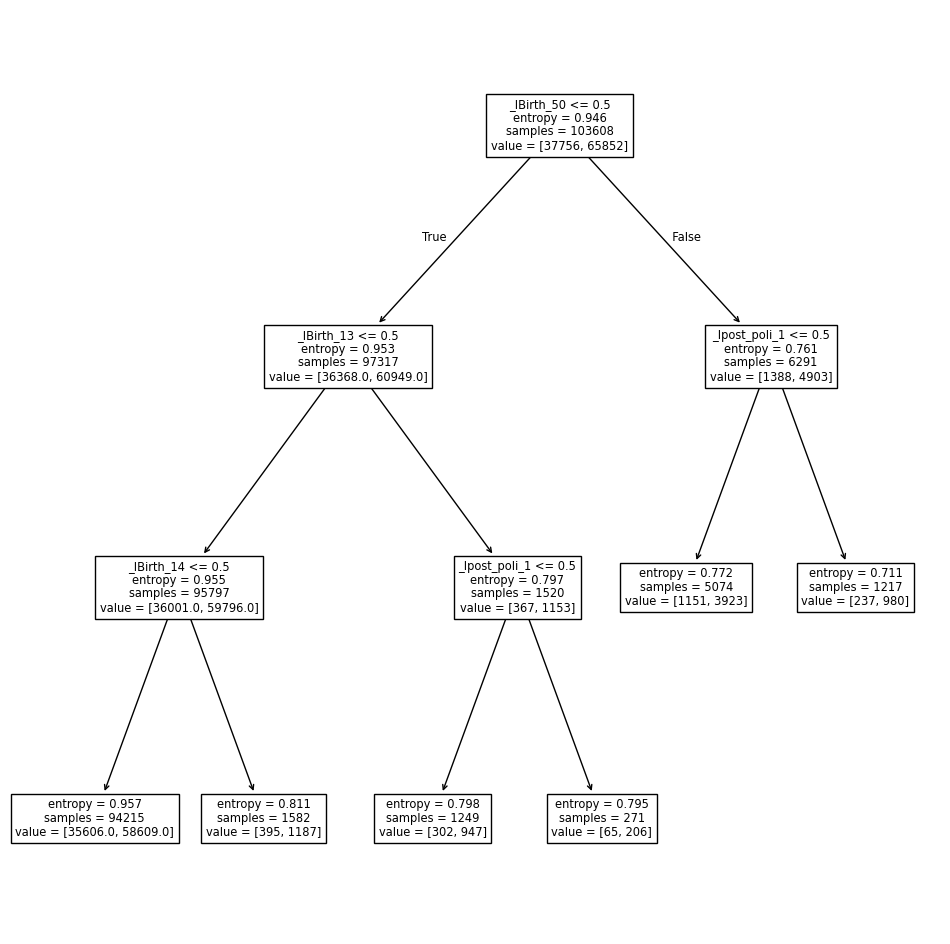

In [97]:
ax = subplots(figsize=(12,12))[1]
plot_tree(clf, 
          feature_names=feature_names, #specify the name of the x-variables you want to show
          ax=ax);

In [101]:
accuracy_score(High, clf.predict(X))
#it is (y, y-hat)

0.6355879854837464

In [100]:
RF_boston = RF(max_features=100,
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2) ###RANDOM FOREST MSE

0.22559010755940825

In [98]:
RF_boston = RF(max_features=100,
               random_state=0).fit(X, High)
feature_imp = pd.DataFrame(
    {'importance':RF_boston.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
_IBirth_50,0.206052
_IBirth_6,0.035593
_IBirth_7,0.034596
_IBirth_5,0.034380
_IBirth_4,0.033875
...,...
_LlBiXpos_10_1,0.000102
_LlBiXpos_8_1,0.000089
_IBirXpos_8_1,0.000085
_IBirXpos_10_1,0.000085


In [ ]:
bag_data = RF(max_features=X_train.shape[1], random_state=0)
bag_data.fit(X_train, y_train)

RandomForestRegressor(max_features=146, random_state=0)

In [103]:
bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=500,
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

KeyboardInterrupt: 

In [104]:
RF_boston = RF(max_features=100,
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)


0.22559010755940825

In [108]:
boost_boston = GBR(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=0)
boost_boston.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.2, n_estimators=5000, random_state=0)

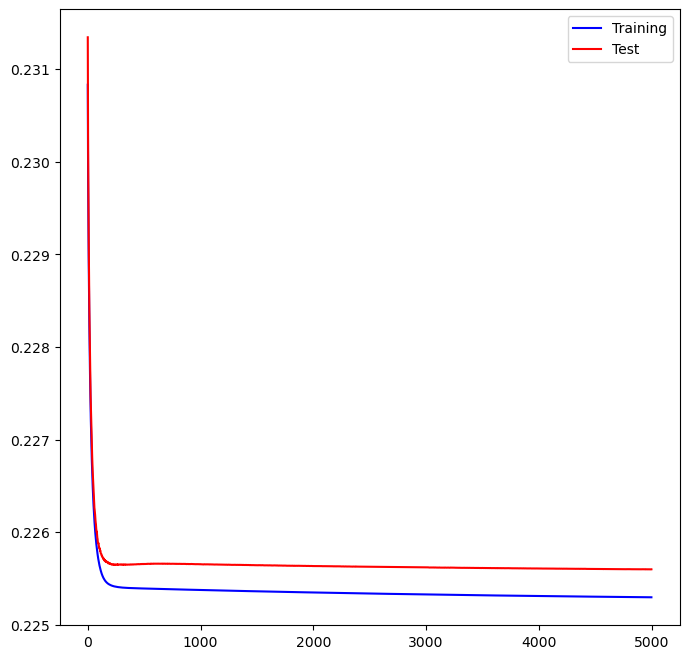

In [109]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
   test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_boston.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();


In [110]:
y_hat_boost = boost_boston.predict(X_test);
np.mean((y_test - y_hat_boost)**2)


0.2255995951102474